# Targeted Marketing

##  <font color='#4267B2'> Connectivity and Networks: Social Network Analysis <font>
### Lilit Petrosyan
---
![](marketing.png)


In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... document start ....................................................

## Situation


## Business Model

In [2]:
initial_interest = 0.01
referal_weight = 0.10
budget = 200000
spend_impact_rate = 0.000009
spend_impact_offset = -0.08

data.frame(initial_interest, referal_weight, budget, spend_impact_rate, spend_impact_offset) %>% caption("business parameters")

initial_interest,referal_weight,budget,spend_impact_rate,spend_impact_offset
0.01,0.1,200000,0.000009,-0.08


## Data 

In [3]:
data.nodes = read.csv("nodes.csv")
data.links = read.csv("links.csv")

real_name = data.nodes[, 2]
data.nodes = data.nodes[, c(1,3)]

row.arrange(data.nodes %>% captionx("nodes"), data.links %>% captionx("links"))  

name,product
Melvin Ashe,A
Winston Allen,A
Walter Alex,A
Sam Sutter,A
Andrew O'Reilly,A
Kevin Miller,B
Mary Miller,B
Sam Albright,B
Nancy Albright,B
Hank Hanover,B


## Network Diagram

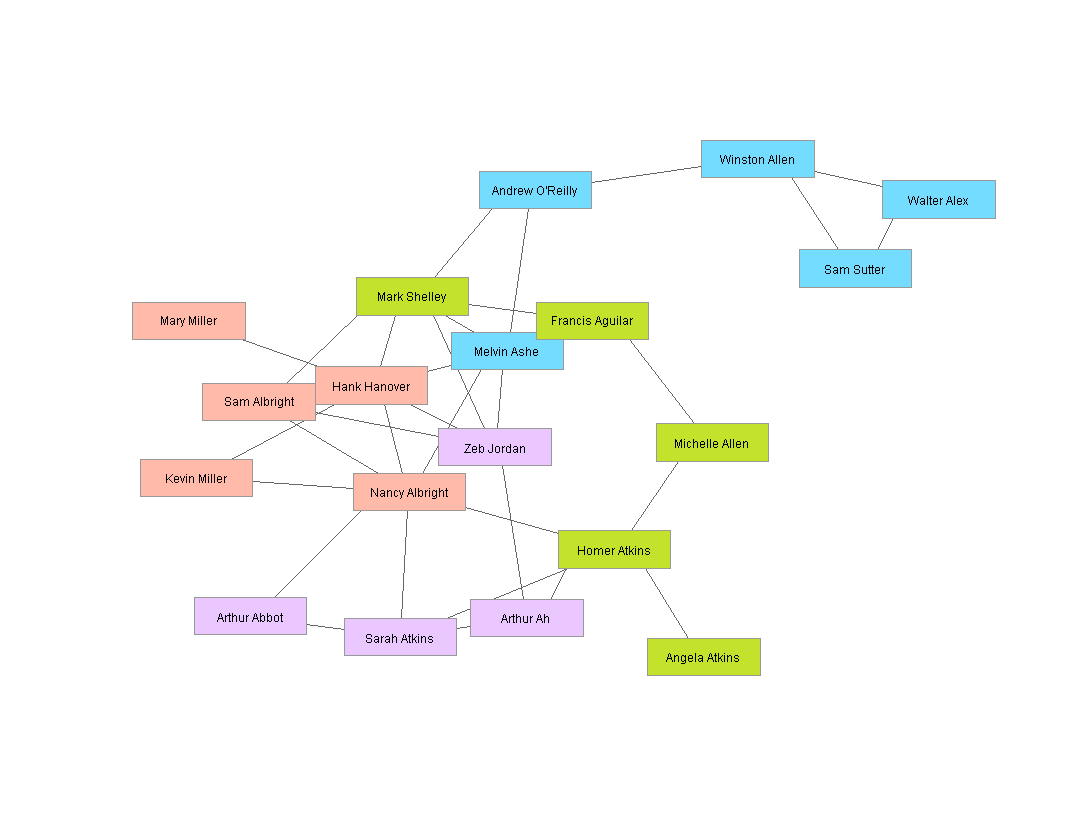

In [4]:
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes)
set.seed(00021)
mylayout = layout_with_gem(g)

output_size(9,7)
set.seed(00021)
plot(g, layout=mylayout, 
     vertex.color=data.nodes$product, palette=lighten(PALETTE, amount=0.2),
     asp=0)
output_size(restore)

## Descriptive Statistics

### Network-Level Statistics

In [5]:
data.frame(size=ecount(g),
           order=vcount(g),
           diameter=diameter(g),
           average_path_length=mean_distance(g),
           density=edge_density(g),
           giant=max(components(g, "strong")$csize)) %>% caption("network-level statistics", row.names=FALSE)

size,order,diameter,average_path_length,density,giant
32,19,6,2.637427,0.1871345,19


### Node-Level Statistics

In [6]:
distances(g) %>% caption("Shortest Path Length", row.names=TRUE)

,Melvin Ashe,Winston Allen,Walter Alex,Sam Sutter,Andrew O'Reilly,Kevin Miller,Mary Miller,Sam Albright,Nancy Albright,Hank Hanover,Mark Shelley,Francis Aguilar,Angela Atkins,Homer Atkins,Michelle Allen,Zeb Jordan,Arthur Ah,Arthur Abbot,Sarah Atkins
Melvin Ashe,0,2,3,3,1,2,2,2,1,1,1,2,3,2,3,1,2,2,2
Winston Allen,2,0,1,1,1,4,4,3,3,3,2,3,5,4,4,3,4,4,4
Walter Alex,3,1,0,1,2,5,5,4,4,4,3,4,6,5,5,4,5,5,5
Sam Sutter,3,1,1,0,2,5,5,4,4,4,3,4,6,5,5,4,5,5,5
Andrew O'Reilly,1,1,2,2,0,3,3,2,2,2,1,2,4,3,3,2,3,3,3
Kevin Miller,2,4,5,5,3,0,2,2,1,1,2,3,3,2,3,2,3,2,2
Mary Miller,2,4,5,5,3,2,0,3,2,1,2,3,4,3,4,2,3,3,3
Sam Albright,2,3,4,4,2,2,3,0,1,2,1,2,3,2,3,1,2,2,2
Nancy Albright,1,3,4,4,2,1,2,1,0,1,2,3,2,1,2,2,2,1,1
Hank Hanover,1,3,4,4,2,1,1,2,1,0,1,2,3,2,3,1,2,2,2


In [7]:
statistics = data.frame(indegree=degree(g, mode="in"),
                        outdegree=degree(g, mode="out"),
                        betweenness=betweenness(g),
                        average_path_length=colSums(distances(g))/(vcount(g)-1),
                        closeness=closeness(g, normalized=TRUE),
                        eccentricity=eccentricity(g, mode="out"),
                        eigencentrality=evcent(g, directed=TRUE)$vector)

statistics %>% caption("node-level statistics", row.names=TRUE)

,indegree,outdegree,betweenness,average_path_length,closeness,eccentricity,eigencentrality
Melvin Ashe,5,5,33.016667,1.944444,0.5142857,3,0.9602457
Winston Allen,3,3,32.000000,3.055556,0.3272727,5,0.1175367
Walter Alex,2,2,0.000000,3.944444,0.2535211,6,0.0341112
Sam Sutter,2,2,0.000000,3.944444,0.2535211,6,0.0341112
Andrew O'Reilly,3,3,45.000000,2.333333,0.4285714,4,0.4543097
Kevin Miller,2,2,0.000000,2.611111,0.3829787,5,0.4458628
Mary Miller,1,1,0.000000,3.000000,0.3333333,5,0.2249368
Sam Albright,3,3,2.350000,2.277778,0.4390244,4,0.6331179
Nancy Albright,7,7,49.500000,1.944444,0.5142857,4,0.9821697
Hank Hanover,6,6,25.850000,2.055556,0.4864865,4,1.0000000


## Data Visualization

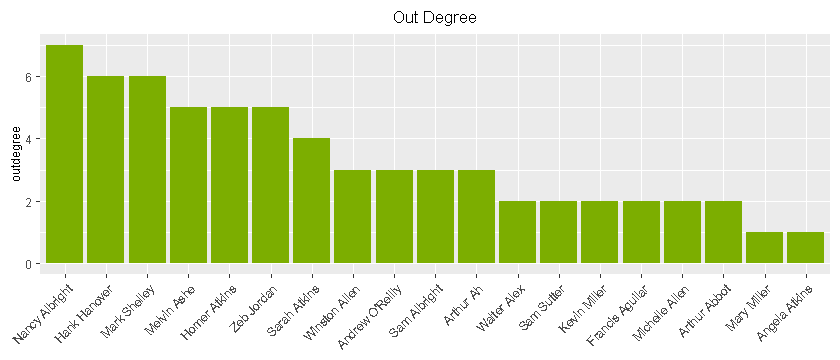

In [8]:
x = statistics[order(statistics$outdegree, decreasing=TRUE),]

ggplot(x) + ggtitle("Out Degree") +
geom_col(aes(x=factor(rownames(x), level=rownames(x)), y=outdegree)) +
theme.x_axis_45 + theme.no_x_axis_title

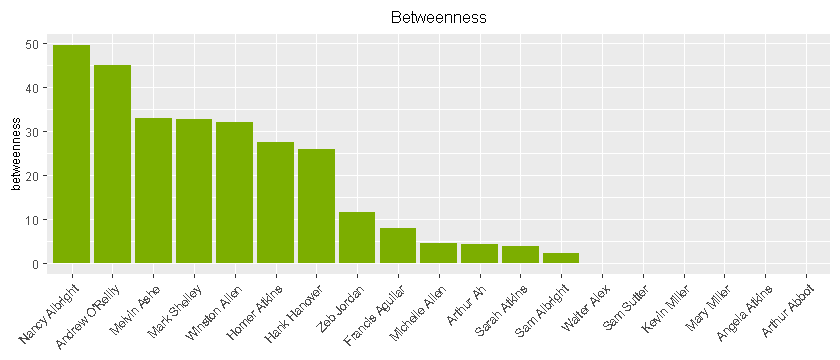

In [9]:
x = statistics[order(statistics$betweenness, decreasing=TRUE),]

ggplot(x) + ggtitle("Betweenness") +
geom_col(aes(x=factor(rownames(x), level=rownames(x)), y=betweenness)) +
theme.x_axis_45 + theme.no_x_axis_title

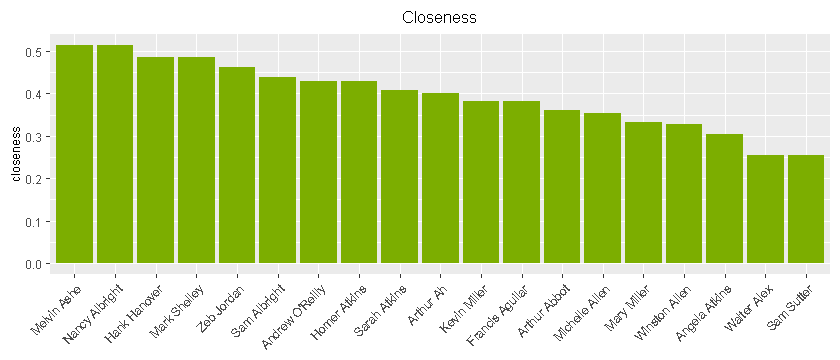

In [10]:
x = statistics[order(statistics$closeness,  decreasing=TRUE),]

ggplot(x) + ggtitle("Closeness") +
geom_col(aes(x=factor(rownames(x), level=rownames(x)), y=closeness)) +
theme.x_axis_45 + theme.no_x_axis_title

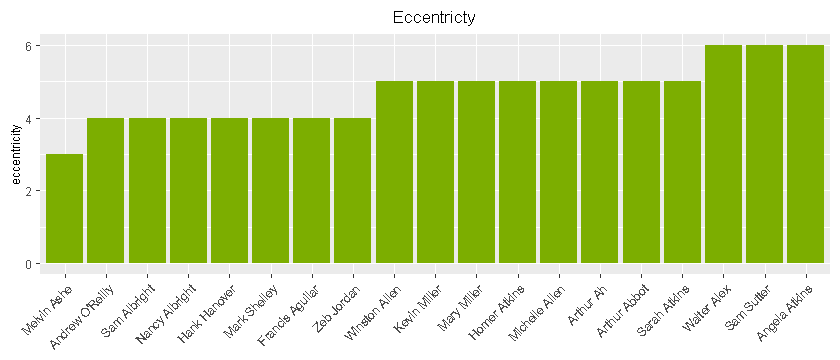

In [11]:
x = statistics[order(statistics$eccentricity),]

ggplot(x) + ggtitle("Eccentricty") +
geom_col(aes(x=factor(rownames(x), level=rownames(x)), y=eccentricity)) +
theme.x_axis_45 + theme.no_x_axis_title

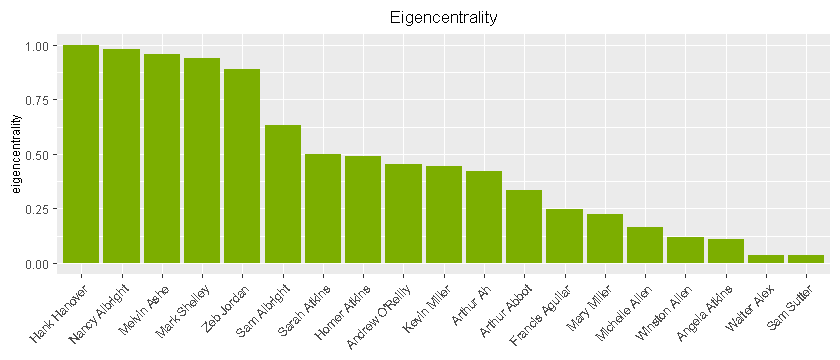

In [12]:
x = statistics[order(statistics$eigencentrality, decreasing=TRUE),]

ggplot(x) + ggtitle("Eigencentrality") +
geom_col(aes(x=factor(rownames(x), level=rownames(x)), y=eigencentrality)) +
theme.x_axis_45 + theme.no_x_axis_title

## Important Nodes

In [13]:
count = rep(0, vcount(g))
names(count) = data.nodes$name

x = statistics[order(statistics$outdegree, decreasing=TRUE),]
count[rownames(x)[1:4]] = count[rownames(x)[1:4]] + 1

x = statistics[order(statistics$betweenness, decreasing=TRUE),]
count[rownames(x)[1:4]] = count[rownames(x)[1:4]] + 1

x = statistics[order(statistics$closeness, decreasing=TRUE),]
count[rownames(x)[1:4]] = count[rownames(x)[1:4]] + 1

x = statistics[order(statistics$eccentricity),]
count[rownames(x)[1:4]] = count[rownames(x)[1:4]] + 1

x = statistics[order(statistics$eigencentrality, decreasing=TRUE),]
count[rownames(x)[1:4]] = count[rownames(x)[1:4]] + 1

top4 = data.frame(count=count[order(count, decreasing=TRUE)])

top4 %>% caption("top 4", row.names=TRUE)

,count
Melvin Ashe,5
Nancy Albright,5
Mark Shelley,4
Hank Hanover,3
Andrew O'Reilly,2
Sam Albright,1
Winston Allen,0
Walter Alex,0
Sam Sutter,0
Kevin Miller,0


## Marketing Campaign Simulation

### No Marketing

**Initialize**

referal_weight,initial_interest
0.1,0.01


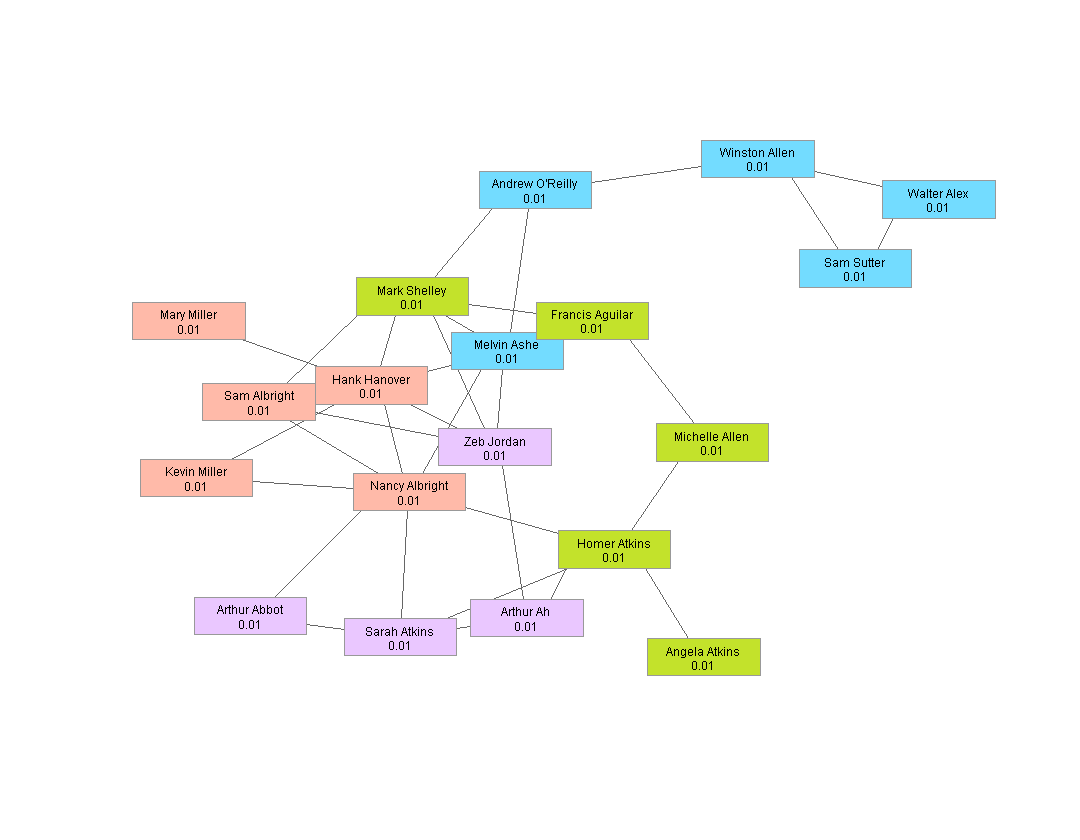

In [14]:
set.seed(12345)

data.nodes.i = data.nodes
data.nodes.i$interest = initial_interest
data.nodes.i$product = factor(data.nodes.i$product, levels=union(levels(data.nodes.i$product), "E"))

data.frame(referal_weight, initial_interest)

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 1**

Re-calculate product adoption based on interest.

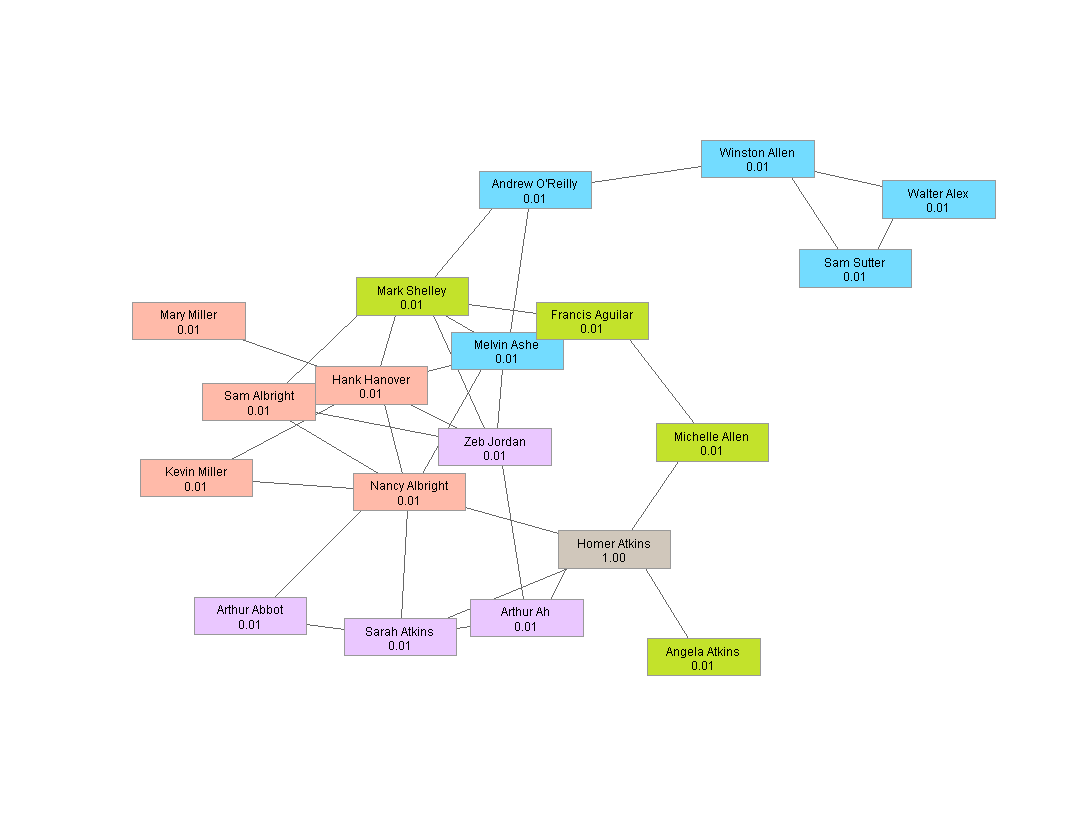

In [15]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

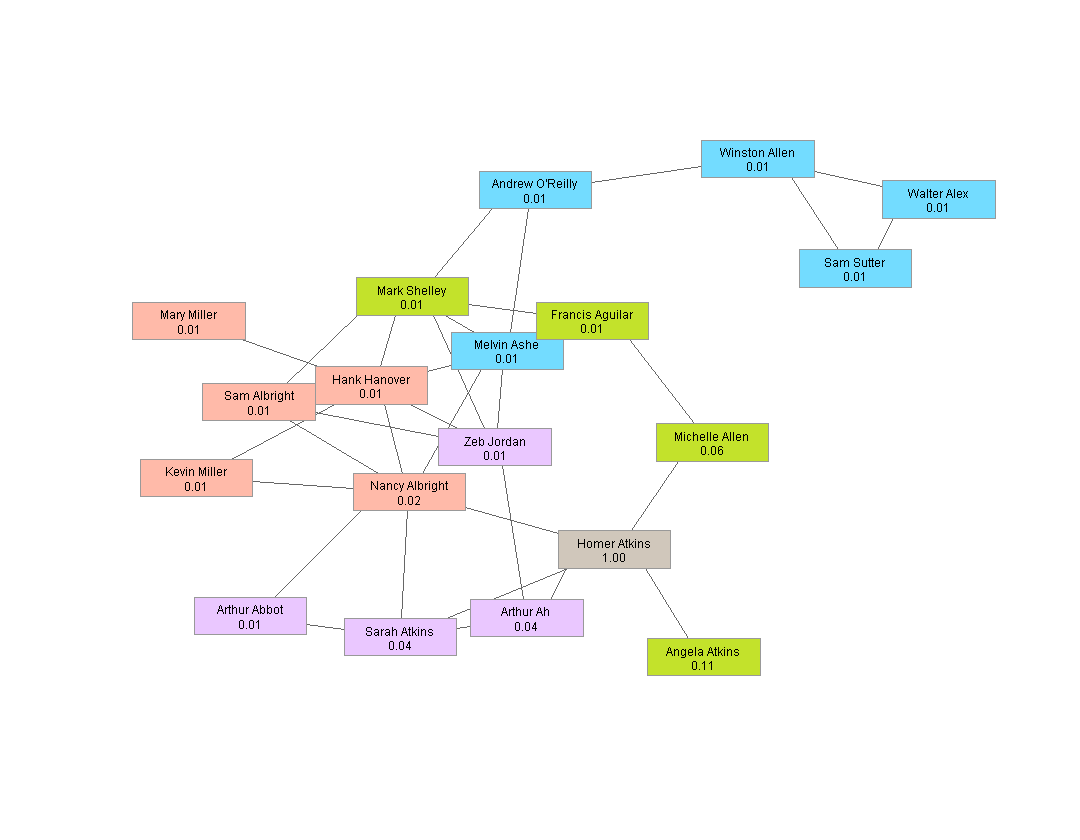

In [16]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 2**

Re-calculate product adoption based on interest.

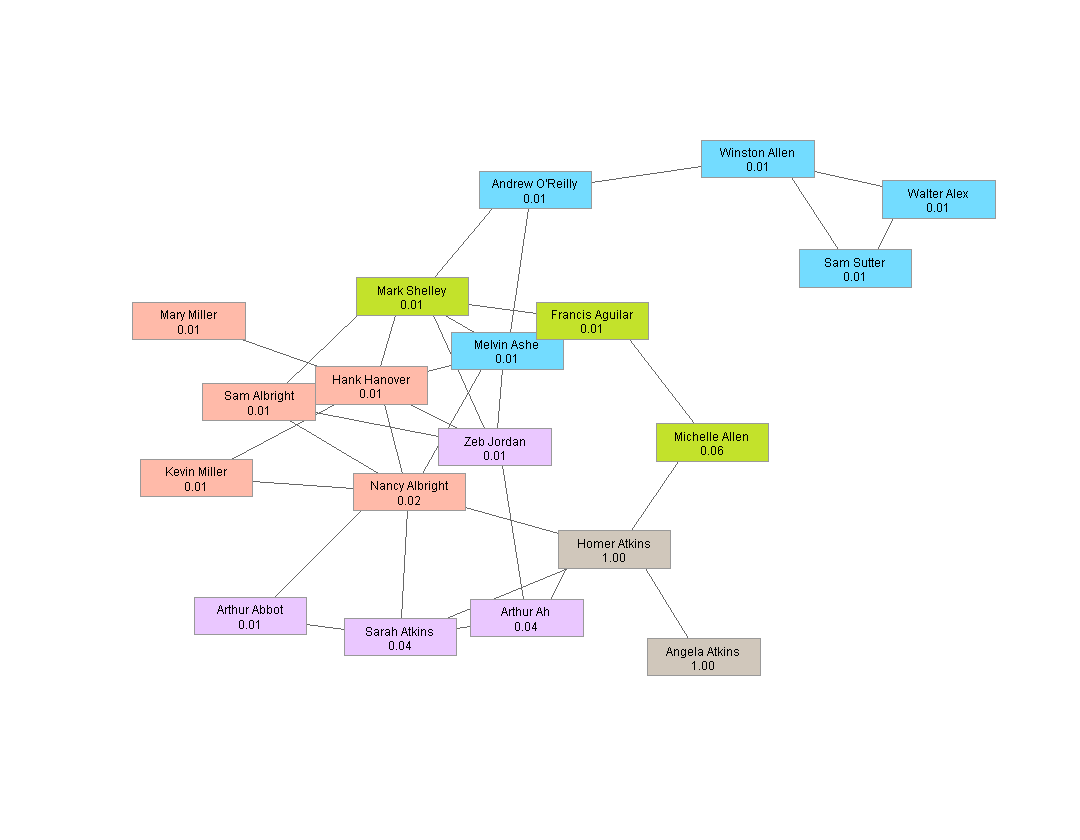

In [17]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

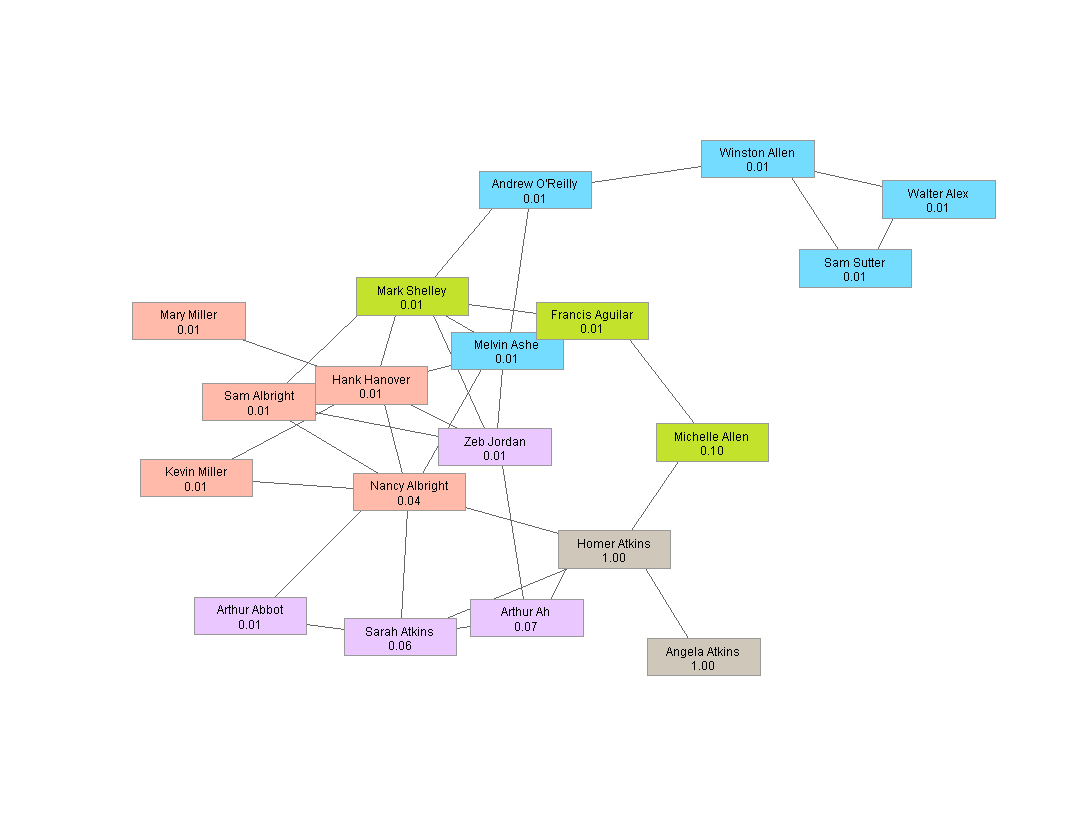

In [18]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 10**

Re-calculate product adoption based on interest and re-calculate interest based on neighbors' interest.

product_adoption_rate
0.3157895


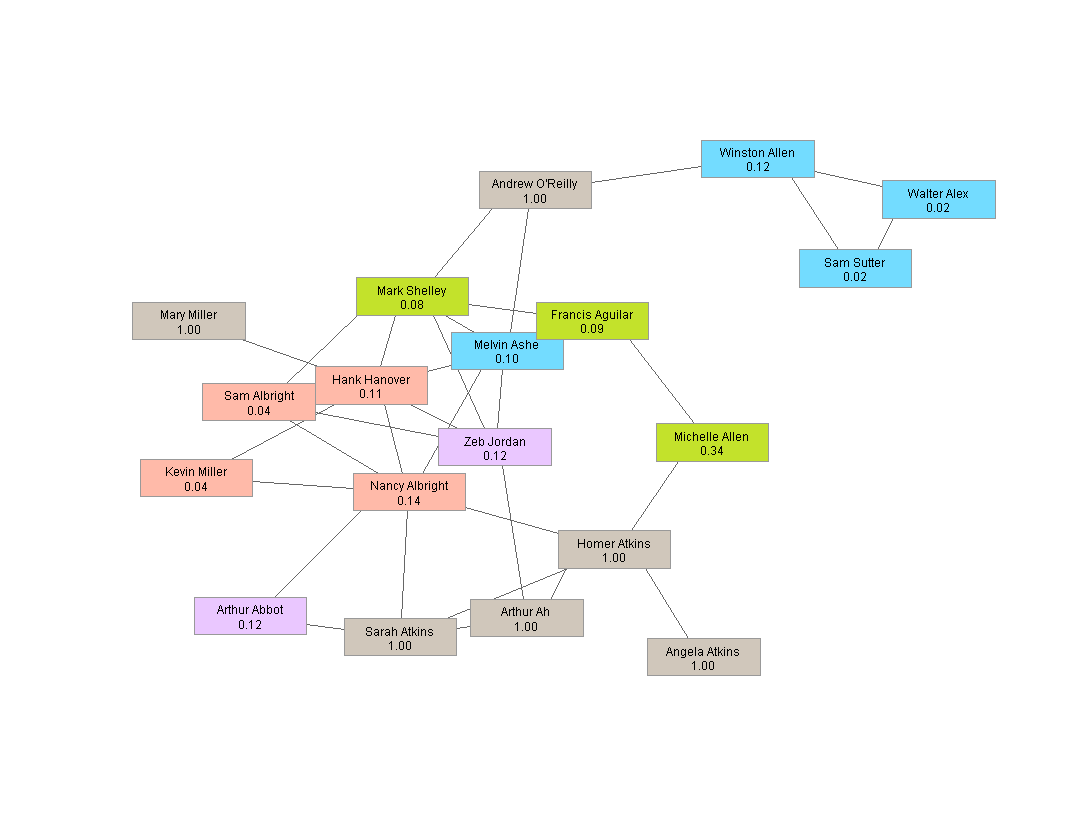

In [19]:
for (step in 3:10)
  { data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
    data.nodes.i$interest[data.nodes.i$product == "E"] = 1
   
    for (i in which(data.nodes.i$product != "E"))
      { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
        data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) } }

product_adoption_rate = length(which(data.nodes.i$product == "E"))/nrow(data.nodes.i)
results = data.frame(strategy="no marketing", product_adoption_rate)

product_adoption_rate %>% fmt

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

### Non-Targeted Marketing

**Initialize**

referal_weight,nontarget_initial_interest
0.1,0.01473684


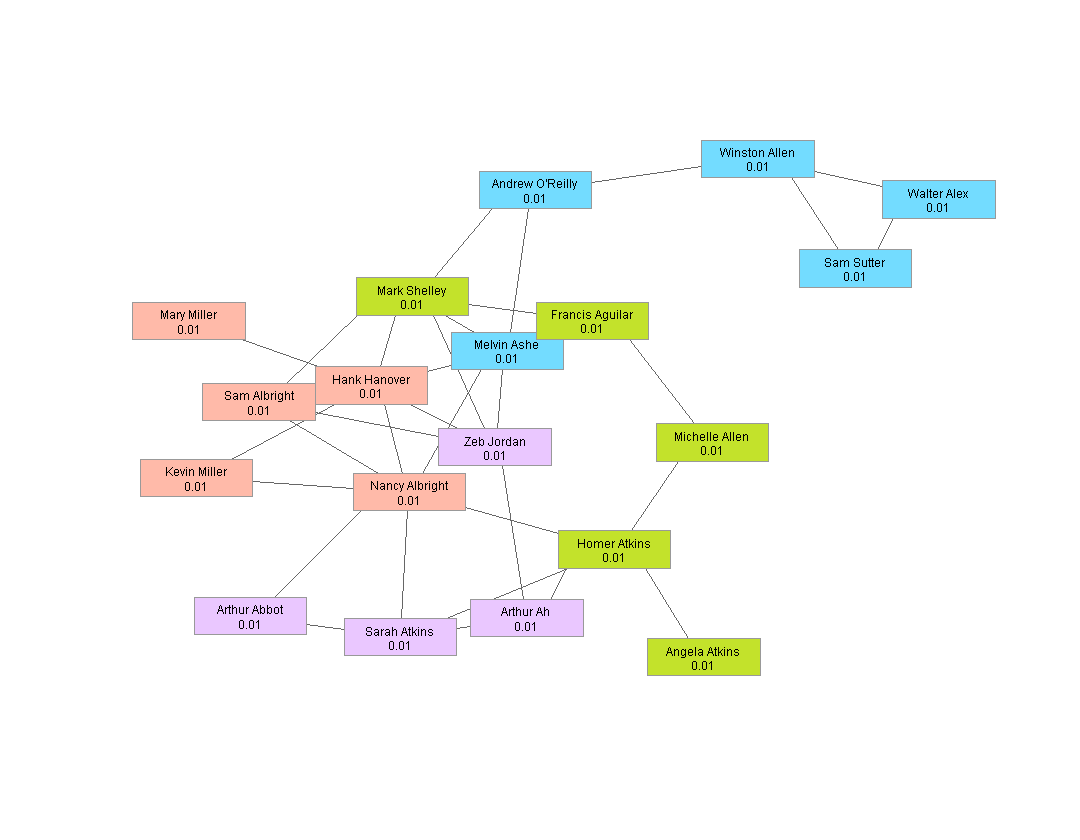

In [20]:
set.seed(12345)

nontarget_initial_interest = min(1, spend_impact_offset + (spend_impact_rate * budget/nrow(data.nodes.i)))

data.nodes.i = data.nodes
data.nodes.i$interest = nontarget_initial_interest
data.nodes.i$product = factor(data.nodes.i$product, levels=union(levels(data.nodes.i$product), "E"))

data.frame(referal_weight, nontarget_initial_interest)

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 1**

Re-calculate product adoption based on interest.

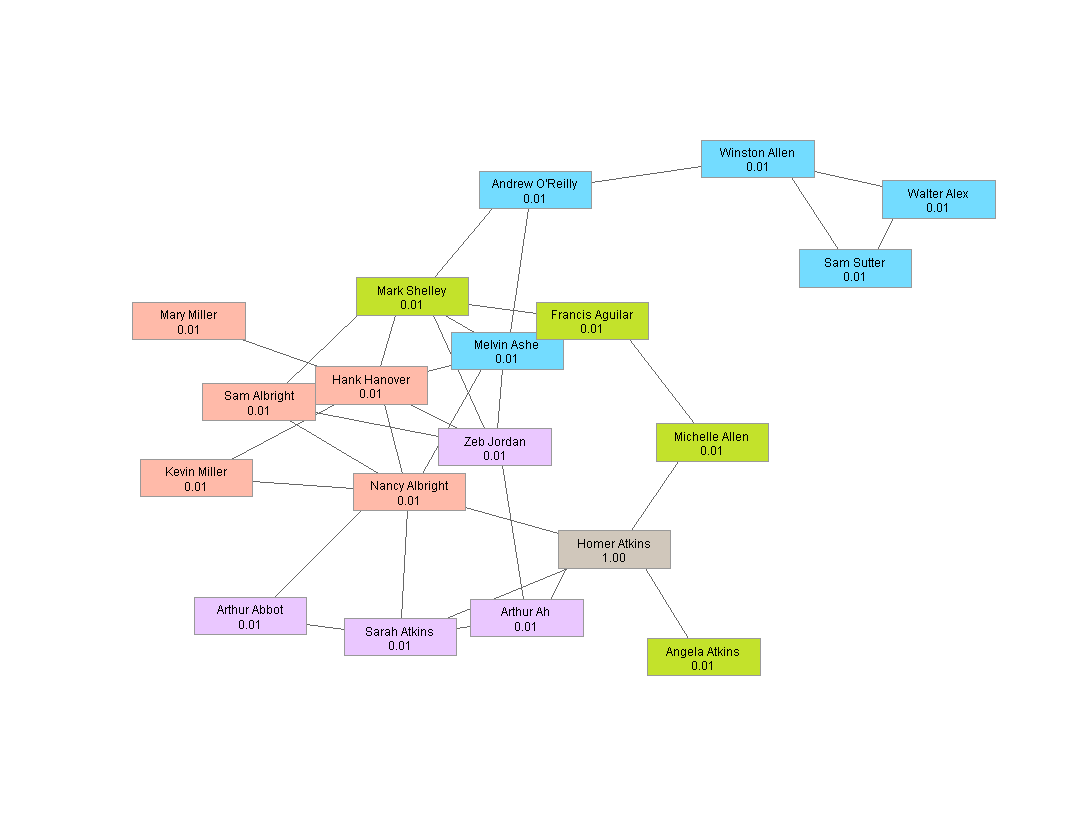

In [21]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

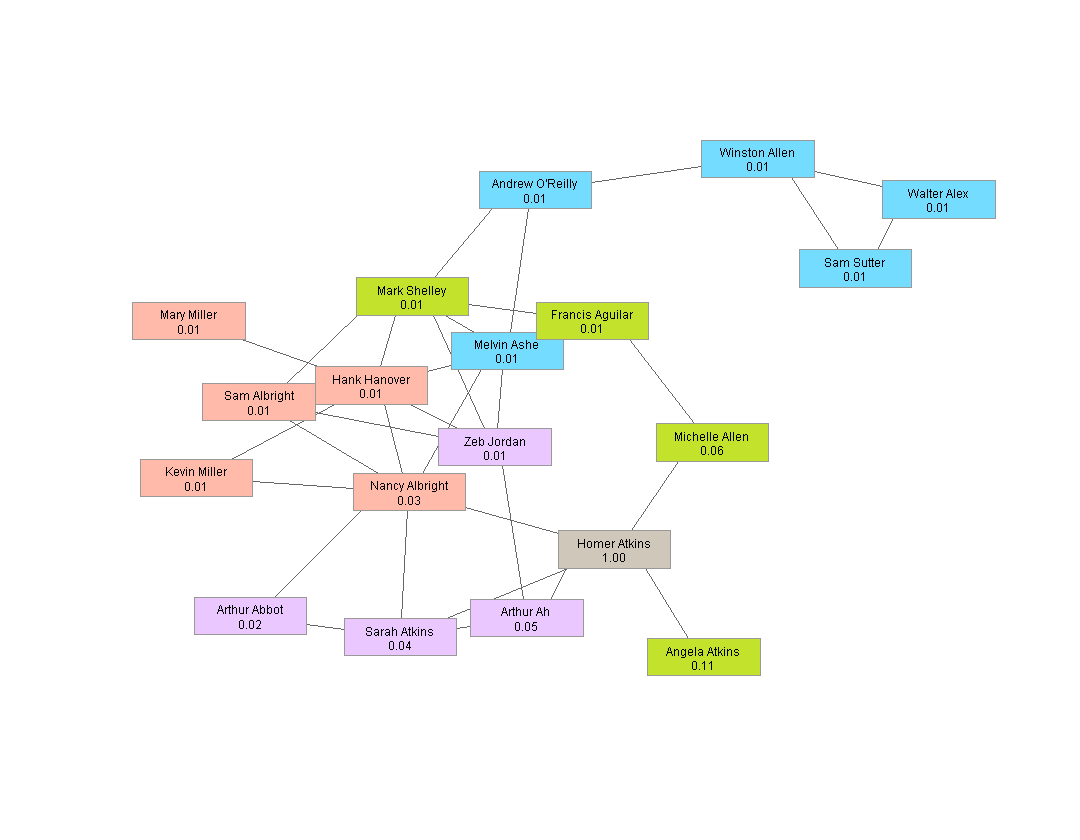

In [22]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 2**

Re-calculate product adoption based on interest.

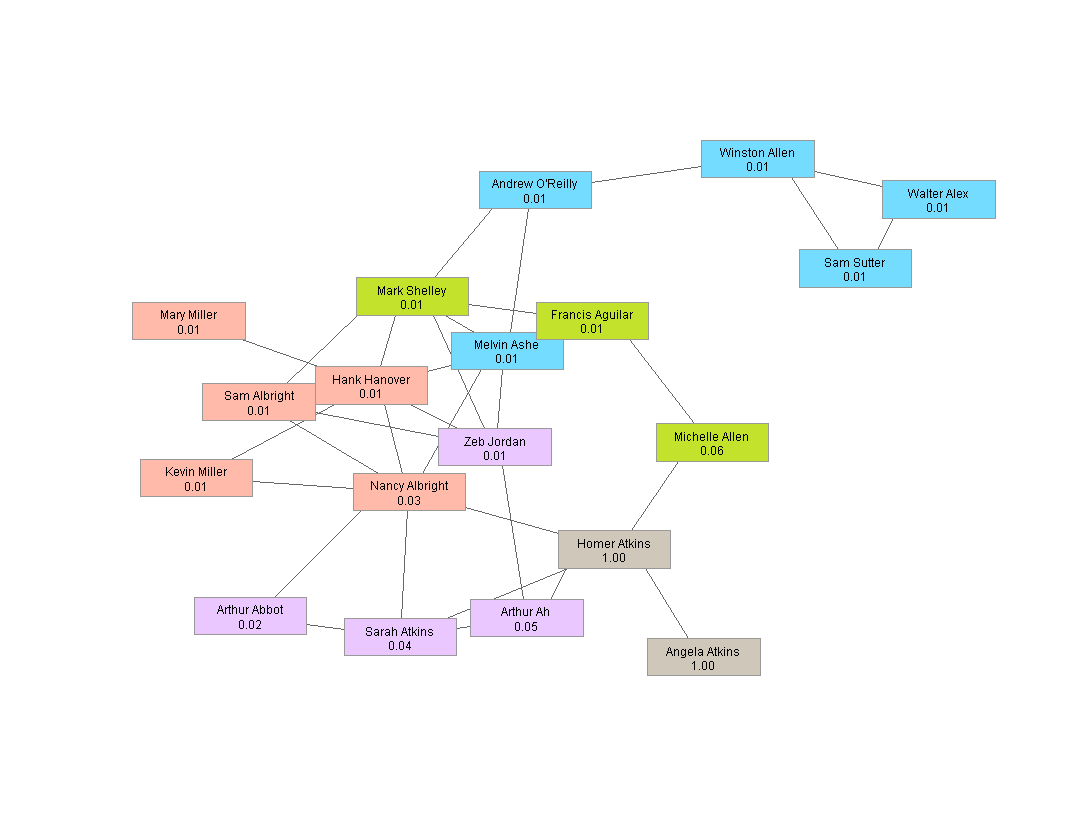

In [23]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

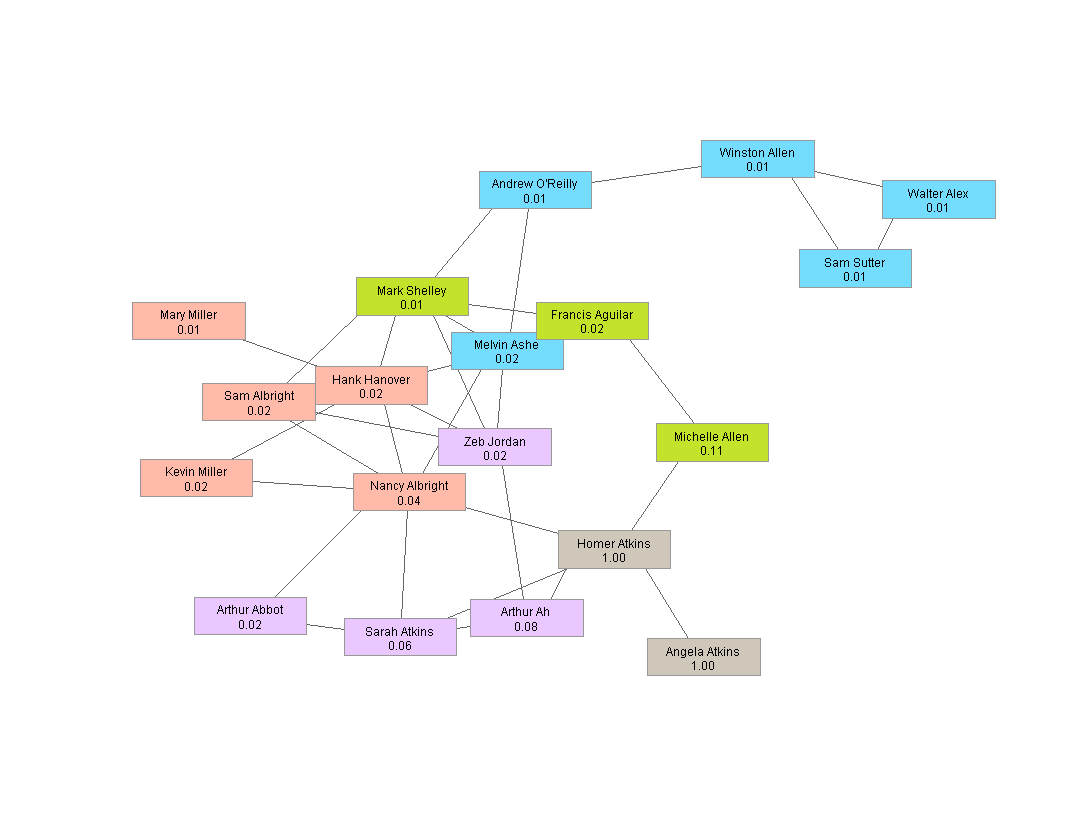

In [24]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 10**

Re-calculate product adoption based on interest and re-calculate interest based on neighbors' interest.

product_adoption_rate
0.4210526


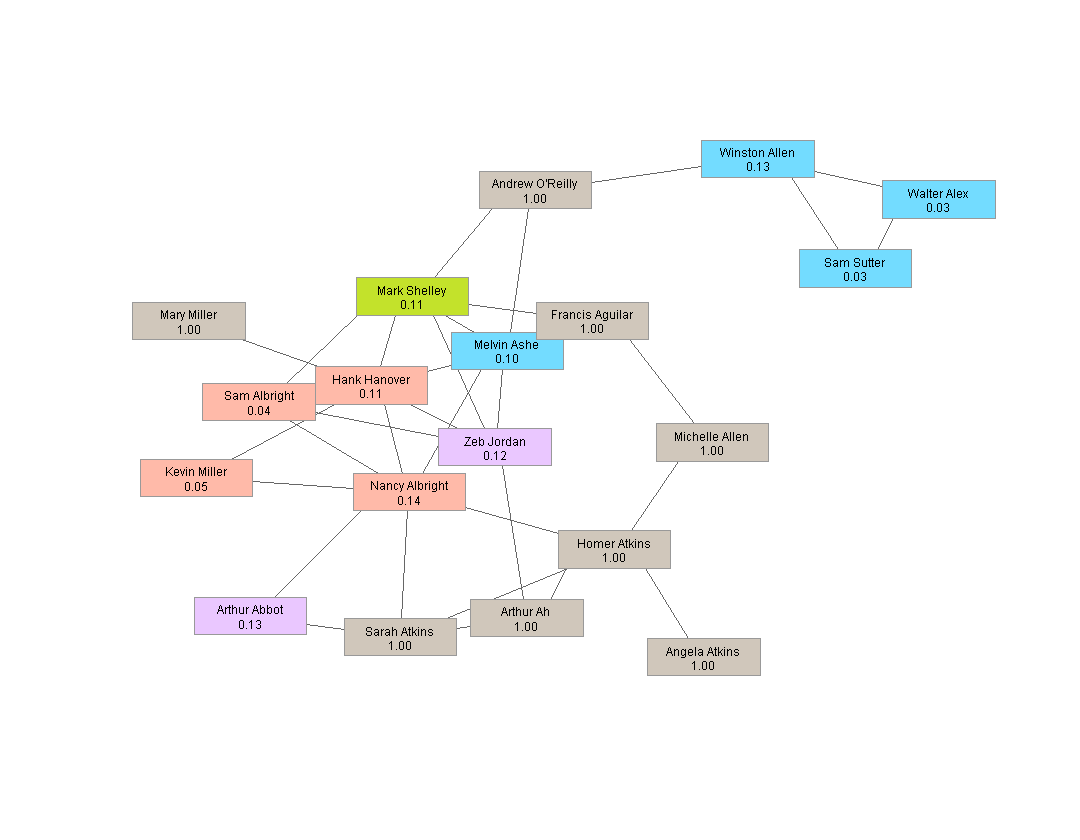

In [25]:
for (step in 3:10)
  { data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
    data.nodes.i$interest[data.nodes.i$product == "E"] = 1
   
    for (i in which(data.nodes.i$product != "E"))
      { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
        data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) } }

product_adoption_rate = length(which(data.nodes.i$product == "E"))/nrow(data.nodes.i)
results = rbind(results, data.frame(strategy="nontargeted marketing", product_adoption_rate))

product_adoption_rate %>% fmt

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

### Targeted Marketing to Unimportant Prospects

**Initialize**

referal_weight,initial_interest,target_initial_interest
0.1,0.01,0.82


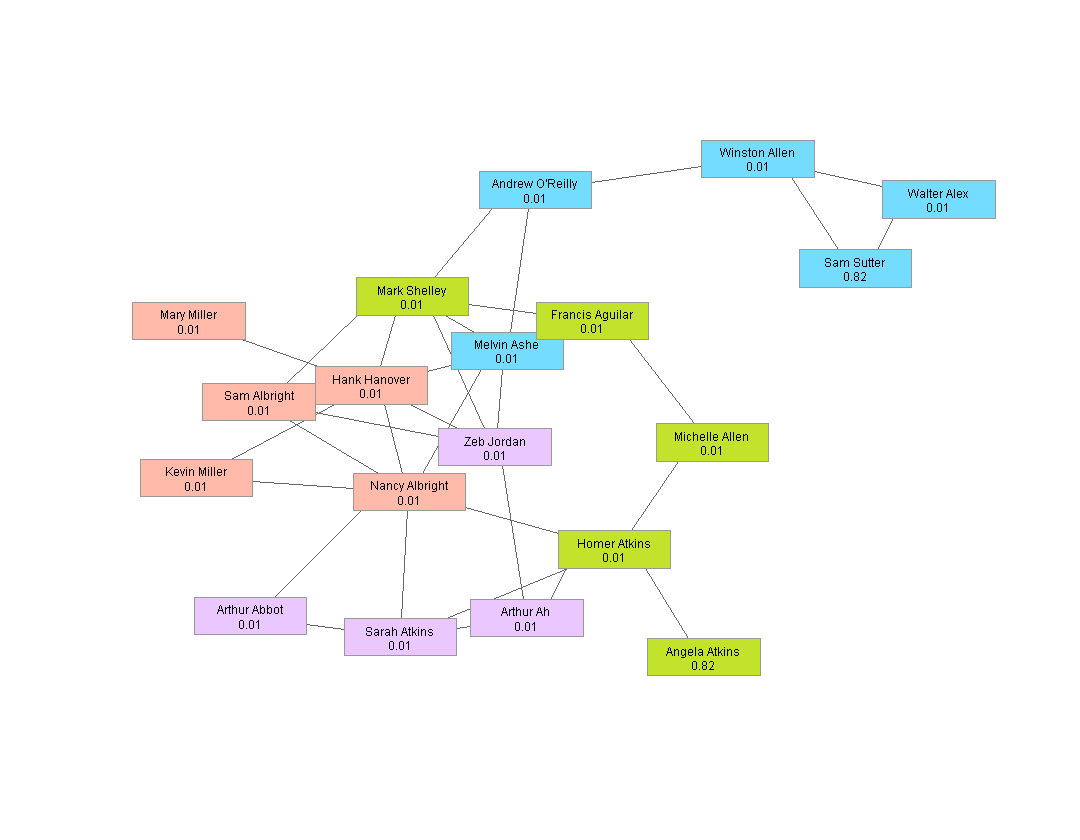

In [26]:
set.seed(12345)

target_initial_interest = min(1, spend_impact_offset + (spend_impact_rate * budget/2))

data.nodes.i = data.nodes
data.nodes.i$interest = initial_interest
data.nodes.i$interest[data.nodes.i$name == rownames(top4)[13]] = target_initial_interest
data.nodes.i$interest[data.nodes.i$name == rownames(top4)[9]]  = target_initial_interest
data.nodes.i$product = factor(data.nodes.i$product, levels=union(levels(data.nodes.i$product), "E"))

data.frame(referal_weight, initial_interest, target_initial_interest)

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 1**

Re-calculate product adoption based on interest.

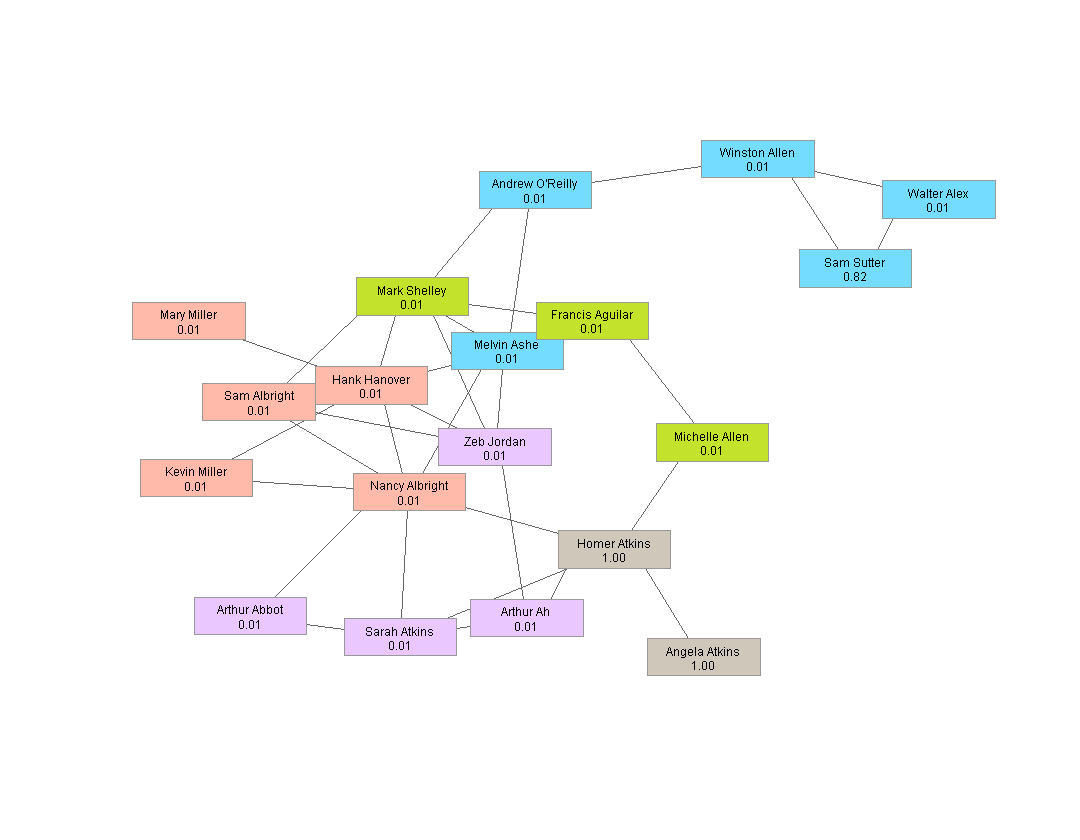

In [27]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

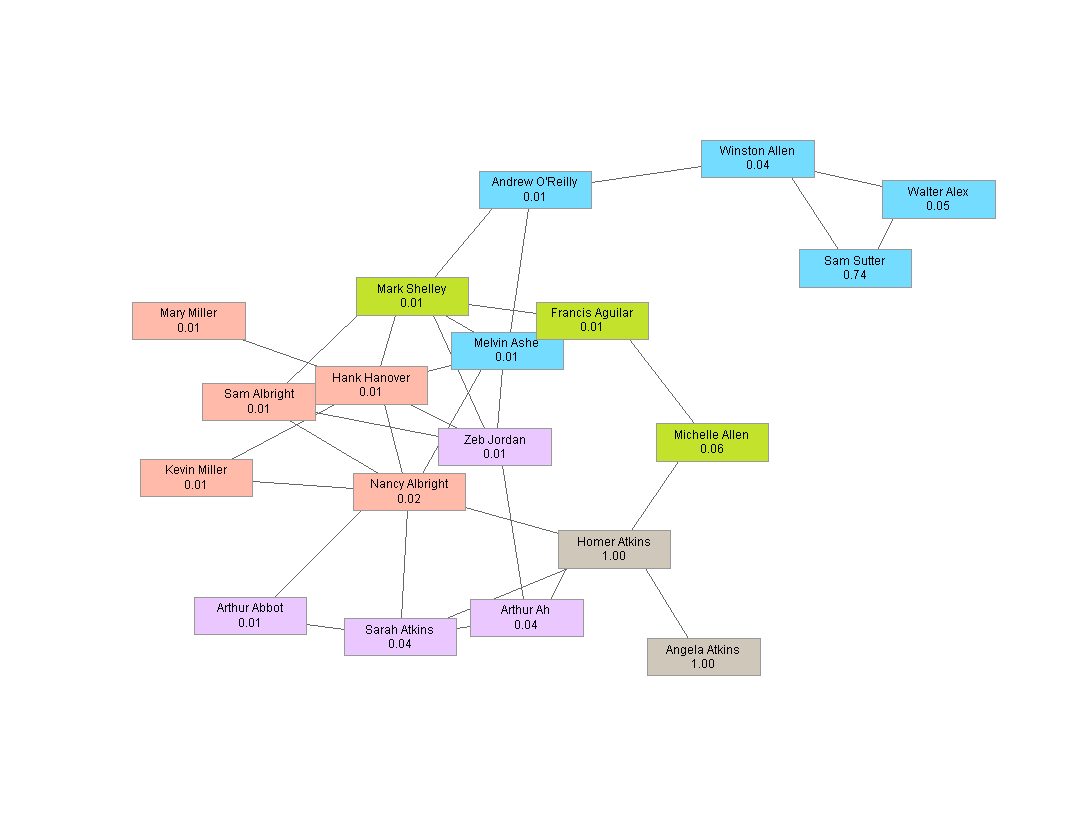

In [28]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 2**

Re-calculate product adoption based on interest.

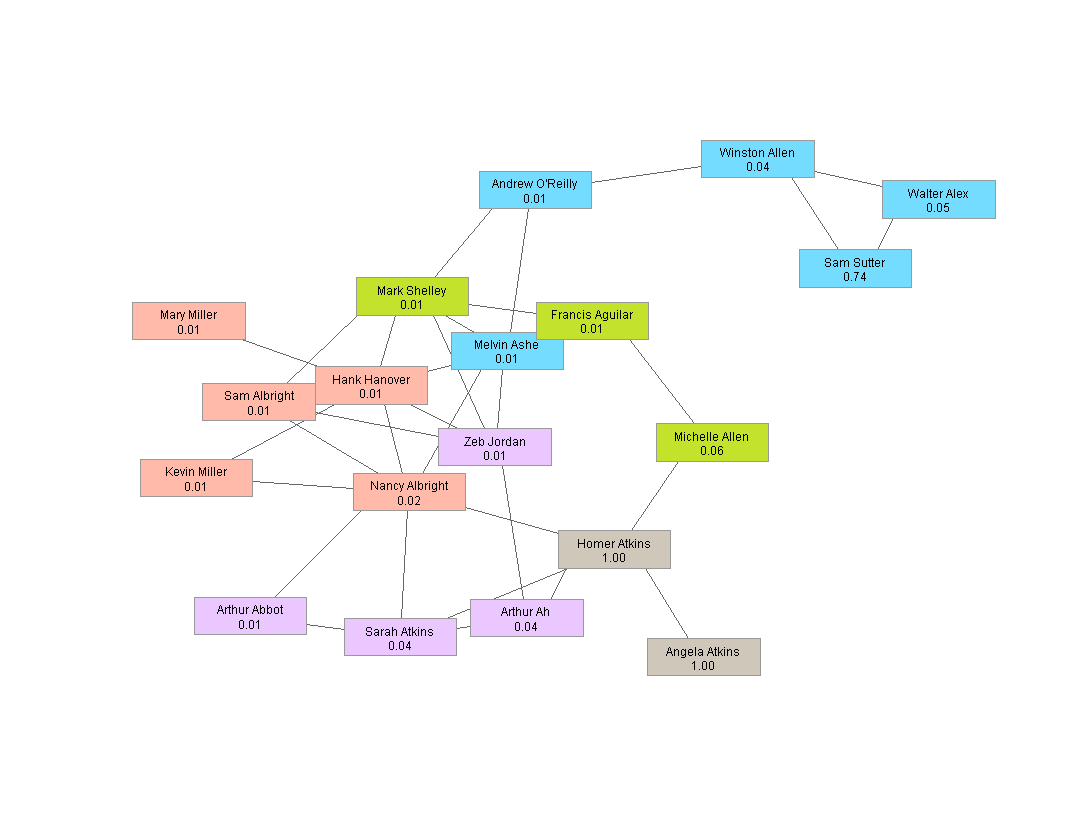

In [29]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

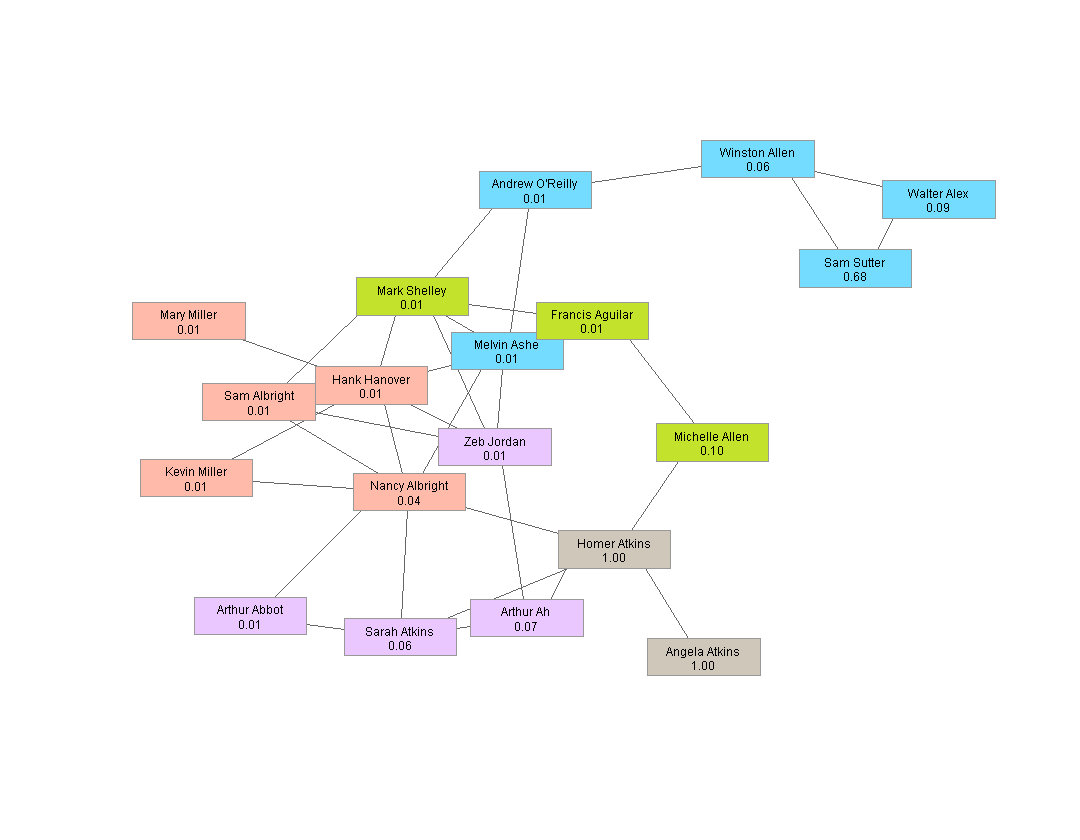

In [30]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 10**

Re-calculate product adoption based on interest and re-calculate interest based on neighbors' interest.

product_adoption_rate
0.4210526


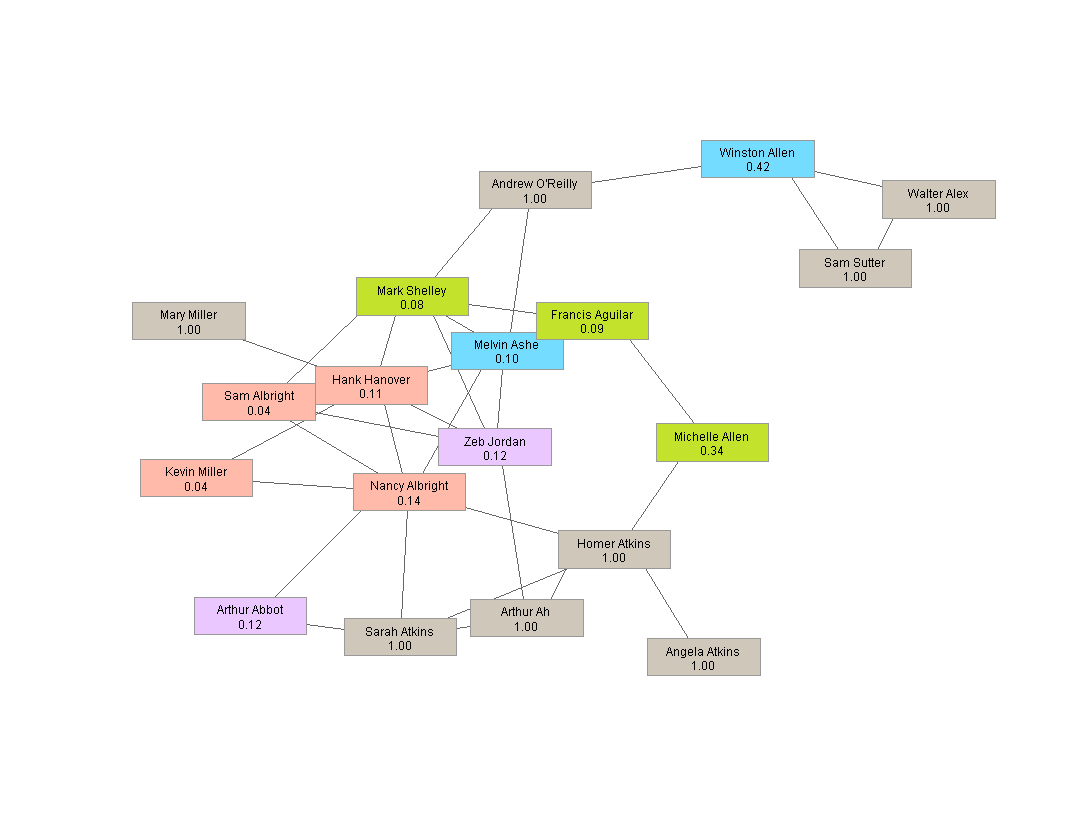

In [31]:
for (step in 3:10)
  { data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
    data.nodes.i$interest[data.nodes.i$product == "E"] = 1
   
    for (i in which(data.nodes.i$product != "E"))
      { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
        data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) } }

product_adoption_rate = length(which(data.nodes.i$product == "E"))/nrow(data.nodes.i)
results = rbind(results, data.frame(strategy="targeted marketing to unimportant", product_adoption_rate))

product_adoption_rate %>% fmt

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

### Targeted Marketing to Important Prospects

**Initialize**

referal_weight,initial_interest,target_initial_interest
0.1,0.01,0.82


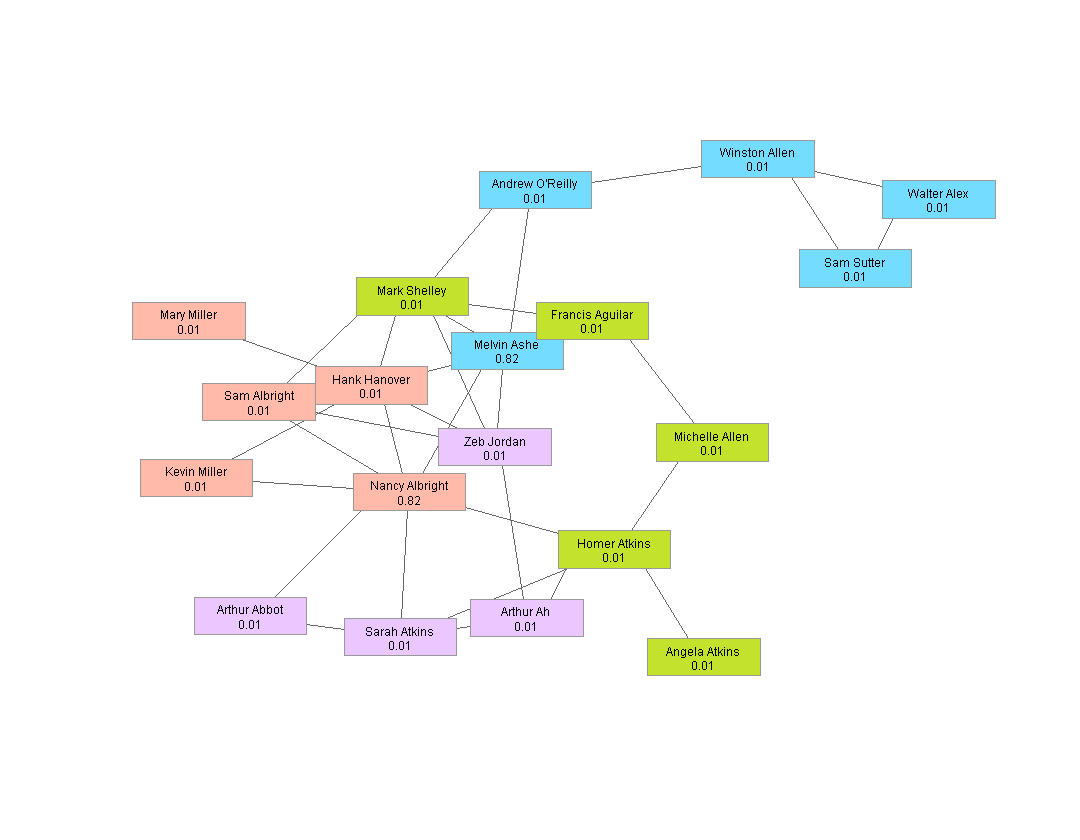

In [32]:
set.seed(12345)

target_initial_interest = min(1, spend_impact_offset + (spend_impact_rate * budget/2))

data.nodes.i = data.nodes
data.nodes.i$interest = initial_interest
data.nodes.i$interest[data.nodes.i$name == rownames(top4)[1]] = target_initial_interest
data.nodes.i$interest[data.nodes.i$name == rownames(top4)[2]] = target_initial_interest
data.nodes.i$product = factor(data.nodes.i$product, levels=union(levels(data.nodes.i$product), "E"))

data.frame(referal_weight, initial_interest, target_initial_interest)

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 1**

Re-calculate product adoption based on interest.

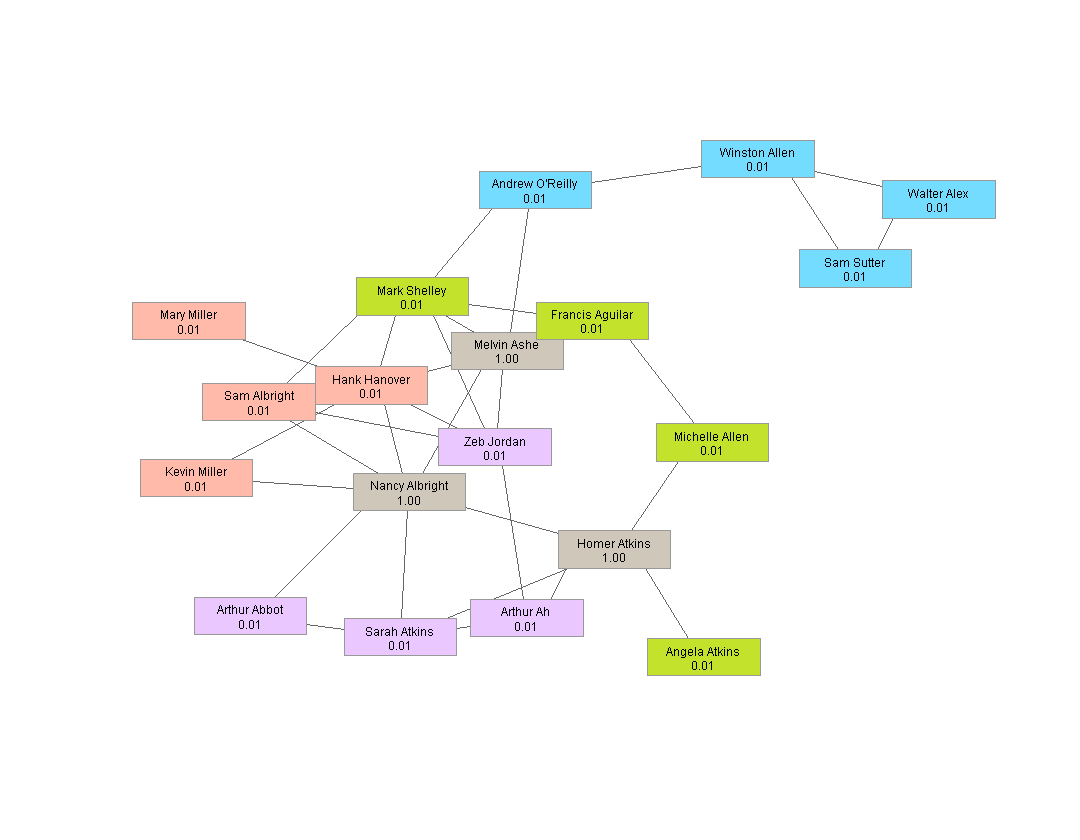

In [33]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

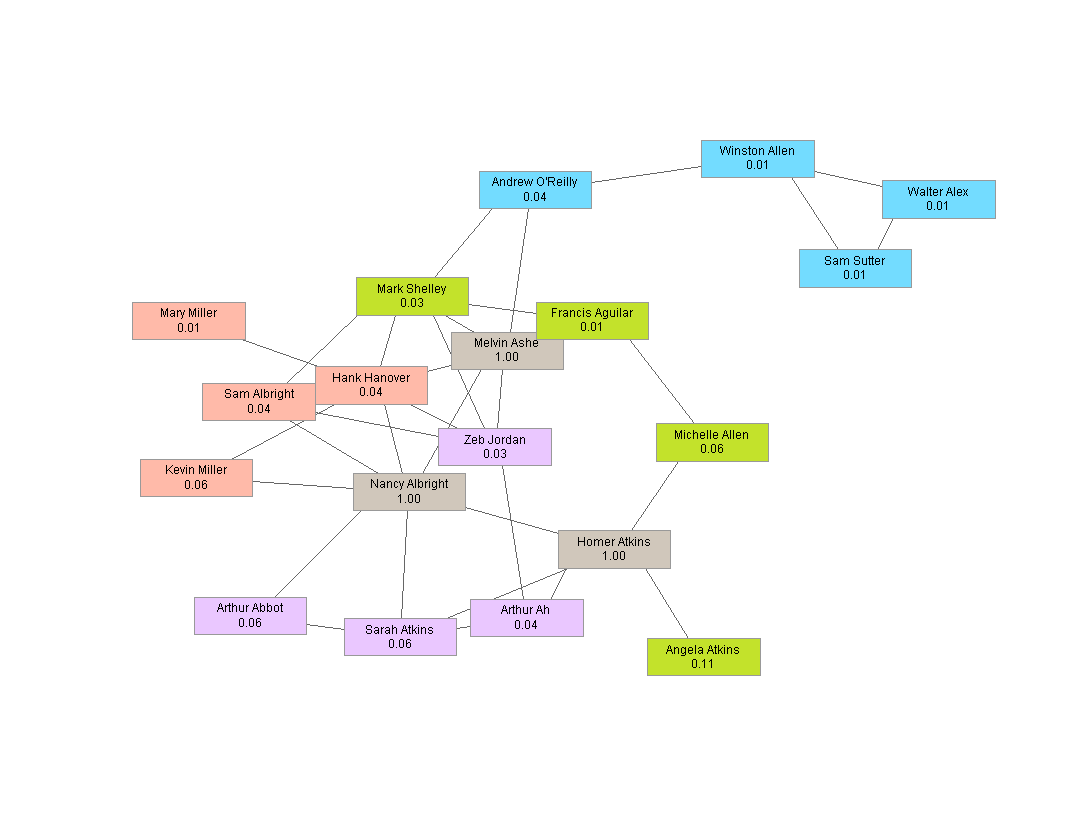

In [34]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 2**

Re-calculate product adoption based on interest.

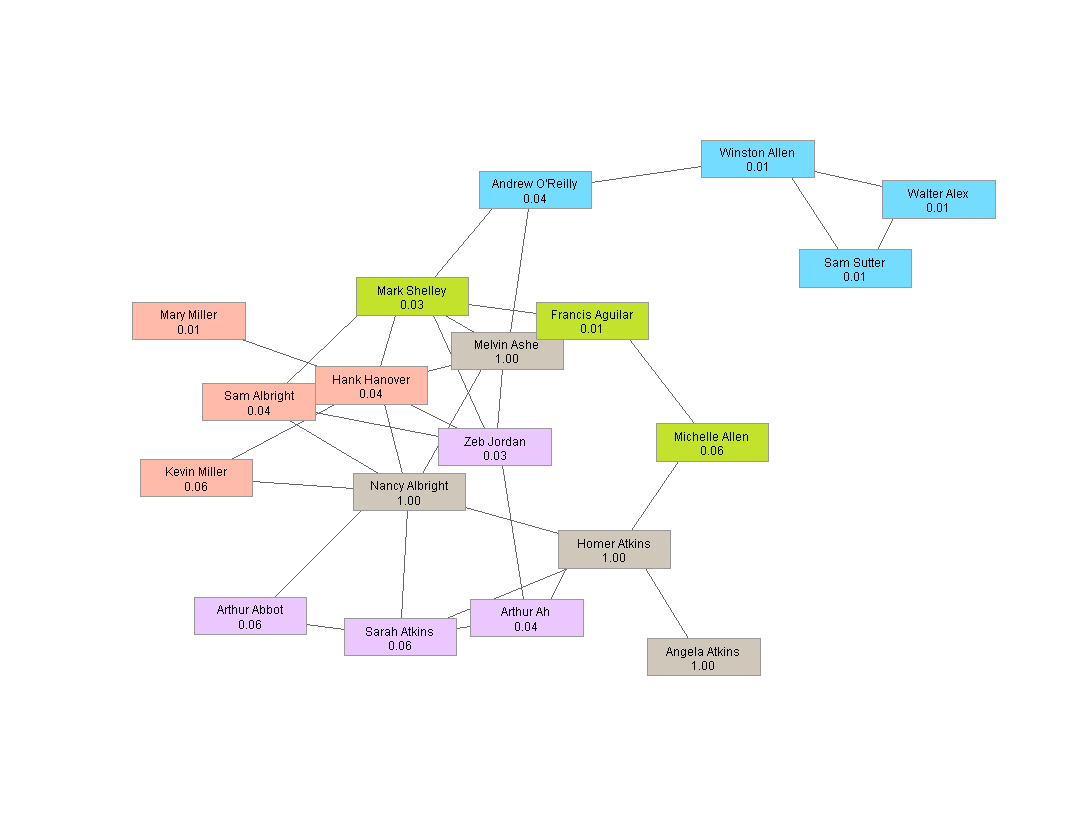

In [35]:
data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
data.nodes.i$interest[data.nodes.i$product == "E"] = 1

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

Re-calculate interest based on neighbors' interest.

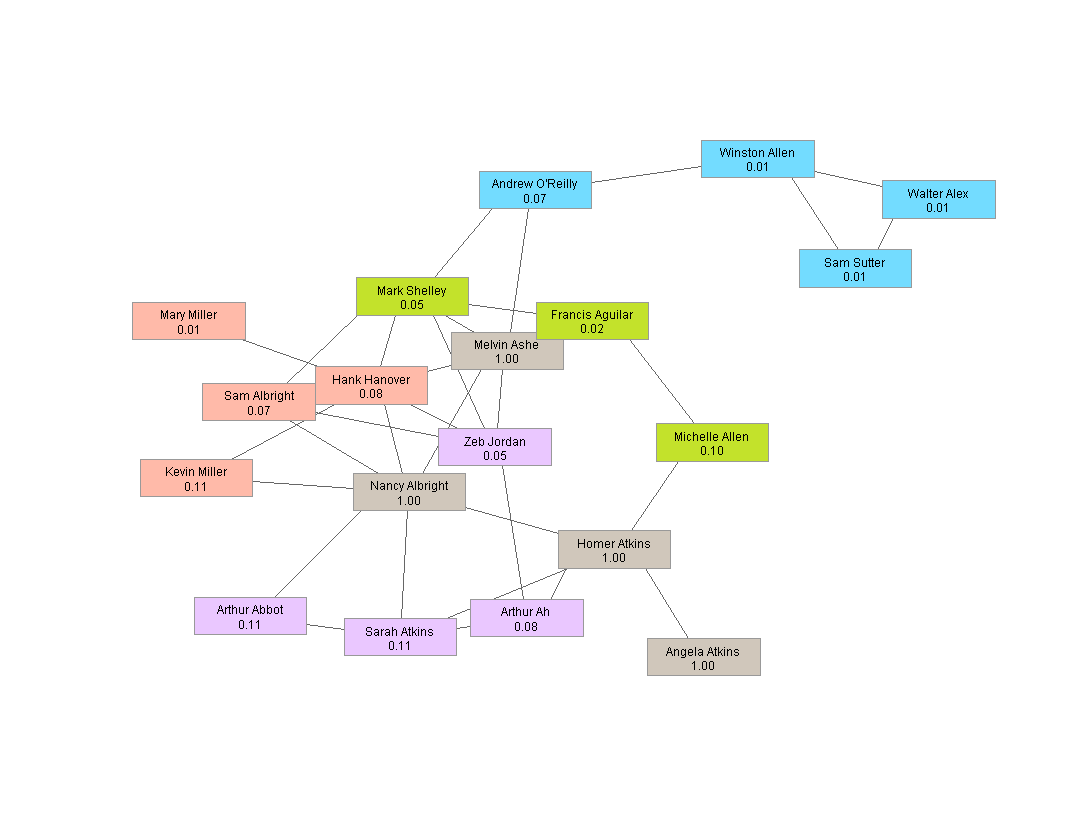

In [36]:
for (i in which(data.nodes.i$product != "E"))
  { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
    data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) }

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

**Step 10**

Re-calculate product adoption based on interest and re-calculate interest based on neighbors' interest.

product_adoption_rate
0.7894737


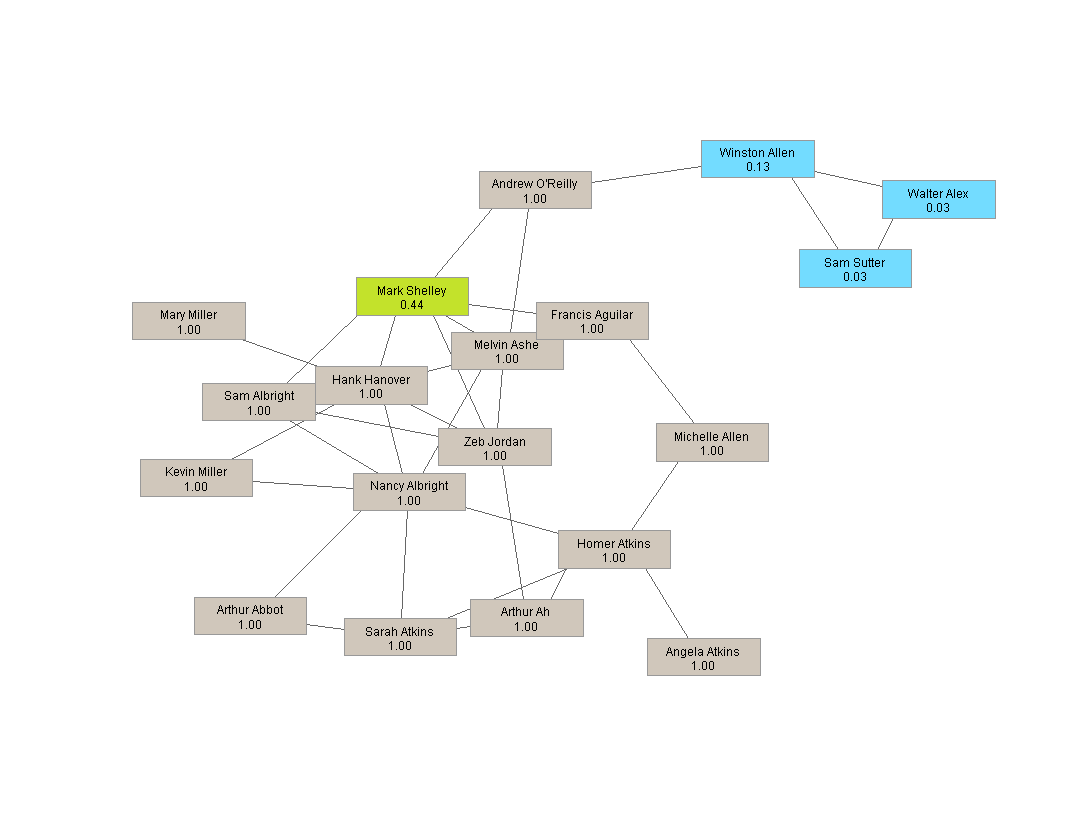

In [37]:
for (step in 3:10)
  { data.nodes.i$product[runif(nrow(data.nodes.i)) < data.nodes.i$interest] = "E"
    data.nodes.i$interest[data.nodes.i$product == "E"] = 1
   
    for (i in which(data.nodes.i$product != "E"))
      { as.numeric(ego(g, nodes=V(g), mindist=1)[[i]])
        data.nodes.i$interest[i] = data.nodes.i$interest[i]*(1-referal_weight) + referal_weight*mean(data.nodes.i[as.numeric(ego(g, nodes=V(g), mindist=1)[[i]]),]$interest) } }

product_adoption_rate = length(which(data.nodes.i$product == "E"))/nrow(data.nodes.i)
results = rbind(results, data.frame(strategy="targeted marketing to important", product_adoption_rate))

product_adoption_rate %>% fmt

output_size(9,7)
g = graph_from_data_frame(data.links, directed=FALSE, vertices=data.nodes.i)
plot(g, layout=mylayout,
     vertex.label=sprintf("%s\n%0.2f", vertex_attr(g)$name, vertex_attr(g)$interest),
     vertex.color=data.nodes.i$product, palette=lighten(PALETTE[c(1:4,8)], amount=0.2),
     asp=0)
output_size(restore)

### Results

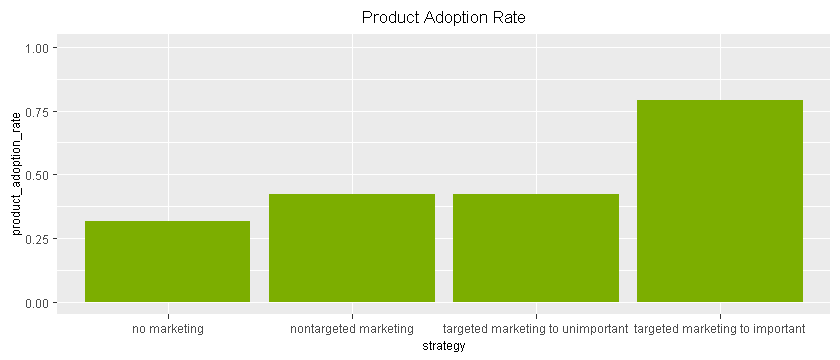

In [38]:
ggplot(results) + ggtitle("Product Adoption Rate") + ylim(0,1) +
geom_col(aes(x=strategy, y=product_adoption_rate))

## Real Names

In [39]:
top4$real_name = real_name[aaply(rownames(top4), 1, function(i) which(i == data.nodes$name))]
top4[2:1] %>% caption("top 4", row.names=TRUE)

,real_name,count
Melvin Ashe,Mohamed Atta,5
Nancy Albright,Nawaf Alhamzi,5
Mark Shelley,Marwan al-Shehhi,4
Hank Hanover,Hani Hanjour,3
Andrew O'Reilly,Abdulaziz Alomari,2
Sam Albright,Salem Alhamzi,1
Winston Allen,Waleed Alshehri,0
Walter Alex,Wail Alshari,0
Sam Sutter,Sata al-Suqami,0
Kevin Miller,Khalid al-Midhar,0


<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised November 22, 2019
</span>
</p>